In [113]:
import geopandas as gpd # for geospatial data handling
import pandas as pd
import osmnx # for handling data from OpenStreetMap (osm) with the help of networkX (nx)
import contextily as cx # for plotting
import matplotlib.pyplot as plt # for plotting
from pyproj import CRS # for more advanced CRS modifications and transformations
import numpy as np

#### Preprocessing the data

In [114]:
def createstationdf (df):
    # Create unique dataframes for start and end stations
    start_stations = df[['start_station_id', 'start_station_name', 'start_station_description', 'start_station_latitude', 'start_station_longitude', 'month', 'year']].drop_duplicates()
    end_stations = df[['end_station_id', 'end_station_name', 'end_station_description', 'end_station_latitude', 'end_station_longitude', 'month', 'year']].drop_duplicates()
    
    # Rename columns for uniformity
    start_stations.columns = ['station_id', 'station_name', 'station_description', 'latitude', 'longitude', 'month', 'year']
    end_stations.columns = ['station_id', 'station_name', 'station_description', 'latitude', 'longitude', 'month', 'year']
    
    # Concatenate the dataframes
    stations = pd.concat([start_stations, end_stations]).drop_duplicates()
    
    # Create GeoDataFrame
    gdf_stations = gpd.GeoDataFrame(
        stations, geometry=gpd.points_from_xy(stations.longitude, stations.latitude), crs = 4326
    )
    return gdf_stations

In [115]:
df = pd.read_csv('data/preprocessed/combined.csv')
station_df = createstationdf(df)

In [116]:
station_df = station_df.to_crs(epsg=3857)

In [117]:
station_df.head(5)

,station_id,station_name,station_description,latitude,longitude,month,year,geometry
0,507,Jens Bjelkes Gate,ved Trondheimsveien,59.919147,10.764130,10,23,POINT (1198257.424 8381758.913)
1,607,Marcus Thranes gate,ved Akerselva,59.932772,10.758595,10,23,POINT (1197641.308 8384785.559)
2,500,Anker Hotel,langs Storgata,59.917279,10.758155,10,23,POINT (1197592.370 8381344.042)
3,599,Paléhaven,langs Strandgata,59.910331,10.750110,10,23,POINT (1196696.771 8379801.076)
4,597,Fredensborg,ved rundkjøringen,59.920995,10.750358,10,23,POINT (1196724.378 8382169.263)


EPSG:3857


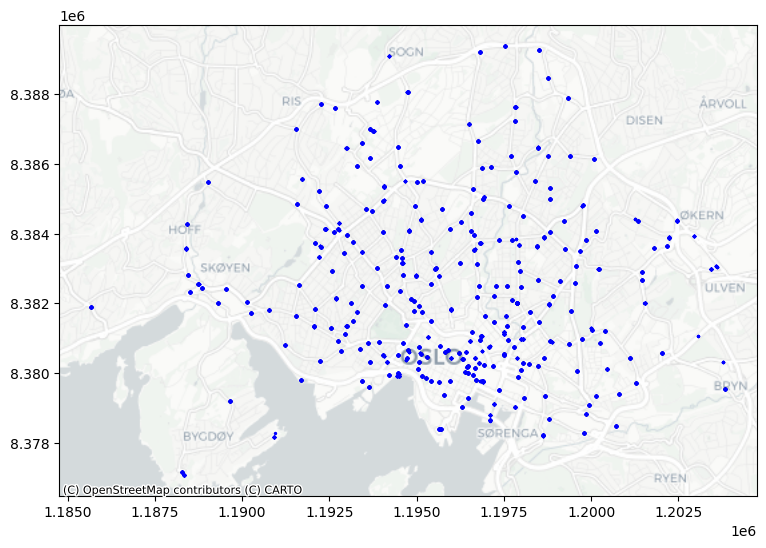

In [118]:
# Transform to an equal area projection
station_df_equal_area = station_df.to_crs(epsg=3857)
print(station_df_equal_area.crs)

ax = station_df_equal_area.plot(color='blue', figsize=(9, 9), markersize=2)
cx.add_basemap(ax, crs=station_df_equal_area.crs, source=cx.providers.CartoDB.Positron)
ax.set_aspect('equal')

#### Get station changes from year to year

In [119]:
# Get number of unique stations for entire dataset and for different years
# Total
number_of_stations_total = len(station_df['station_id'].unique())
stations_total = (station_df['station_id'].unique())
# 2019
number_of_stations_2019 = len(station_df['station_id'].loc[station_df['year'] == 19].unique())
stations_2019 = station_df['station_id'].loc[station_df['year'] == 19].unique()
#2020
number_of_stations_2020 = len(station_df['station_id'].loc[station_df['year'] == 20].unique())
stations_2020 = station_df['station_id'].loc[station_df['year'] == 20].unique()
#2021
number_of_stations_2021 = len(station_df['station_id'].loc[station_df['year'] == 21].unique())
stations_2021 = station_df['station_id'].loc[station_df['year'] == 21].unique()
#2022
number_of_stations_2022 = len(station_df['station_id'].loc[station_df['year'] == 22].unique())
stations_2022 = station_df['station_id'].loc[station_df['year'] == 22].unique()
#2023
number_of_stations_2023 = len(station_df['station_id'].loc[station_df['year'] == 23].unique())
stations_2023 = station_df['station_id'].loc[station_df['year'] == 23].unique()
#2024
number_of_stations_2024 = len(station_df['station_id'].loc[station_df['year'] == 24].unique())
stations_2024 = station_df['station_id'].loc[station_df['year'] == 24].unique()

In [120]:
print(number_of_stations_2019)
print(number_of_stations_2020)
print(number_of_stations_2021)
print(number_of_stations_2022)
print(number_of_stations_2023)
print(number_of_stations_2024)

254
255
262
269
273
268


In [121]:
# Get difference in stations from year to year
difference_19_20 = set(stations_2020) - set(stations_2019)
difference_20_19 = set(stations_2019) - set(stations_2020)
difference_20_21 = set(stations_2021) - set(stations_2020)
difference_21_20 = set(stations_2020) - set(stations_2021)
difference_21_22 = set(stations_2022) - set(stations_2021)
difference_22_21 = set(stations_2021) - set(stations_2022)
difference_22_23 = set(stations_2023) - set(stations_2022)
difference_23_22 = set(stations_2022) - set(stations_2023)
difference_23_24 = set(stations_2024) - set(stations_2023)
difference_24_23 = set(stations_2023) - set(stations_2024)

In [122]:
print(list(difference_19_20))
print(list(difference_20_21))
print(list(difference_21_22))
print(list(difference_22_23))
print(list(difference_23_24))

[487, 2280, 428, 2270, 1919]
[2304, 2305, 2306, 2307, 2308, 2309, 584, 2315, 2328, 2329, 2330]
[2337, 2339, 2340, 2347, 2349, 2350, 2351, 2355, 2332, 2333, 2334]
[546, 4552, 395, 3725, 528, 2357, 566, 2358]
[4683]


In [123]:
print(list(difference_20_19))
print(list(difference_21_20))
print(list(difference_22_21))
print(list(difference_23_22))
print(list(difference_24_23))

[584, 538, 515, 419]
[528, 386, 395, 492]
[477, 734, 566, 494]
[536, 553, 557, 606]
[385, 546, 739, 518, 391, 502]


#### Visualizing changes in station network

In [124]:
# Datasets with stations for different years
stations_2019_df = station_df.loc[station_df['year'] == 19]
stations_2020_df = station_df.loc[station_df['year'] == 20]
stations_2021_df = station_df.loc[station_df['year'] == 21]
stations_2022_df = station_df.loc[station_df['year'] == 22]
stations_2023_df = station_df.loc[station_df['year'] == 23]
stations_2024_df = station_df.loc[station_df['year'] == 24]

In [125]:
# Datasets with changes in stations from year to year
stations_change_2019_2020_df = stations_2020_df.loc[stations_2020_df['station_id'].isin(list(difference_19_20))]
stations_change_2020_2019_df = stations_2019_df.loc[stations_2019_df['station_id'].isin(list(difference_20_19))]

stations_change_2020_2021_df = stations_2021_df.loc[stations_2021_df['station_id'].isin(list(difference_20_21))]
stations_change_2021_2020_df = stations_2020_df.loc[stations_2020_df['station_id'].isin(list(difference_21_20))]

stations_change_2021_2022_df = stations_2022_df.loc[stations_2022_df['station_id'].isin(list(difference_21_22))]
stations_change_2022_2021_df = stations_2021_df.loc[stations_2021_df['station_id'].isin(list(difference_22_21))]

stations_change_2022_2023_df = stations_2023_df.loc[stations_2023_df['station_id'].isin(list(difference_22_23))]
stations_change_2023_2022_df = stations_2022_df.loc[stations_2022_df['station_id'].isin(list(difference_23_22))]

stations_change_2023_2024_df = stations_2024_df.loc[stations_2024_df['station_id'].isin(list(difference_23_24))]
stations_change_2024_2023_df = stations_2023_df.loc[stations_2023_df['station_id'].isin(list(difference_24_23))]

In [126]:
stations_change_2019_2020_df

,station_id,station_name,station_description,latitude,longitude,month,year,geometry
3377984,428,Olav Kyrres plass,ved den sveitsiske ambassade,59.919334,10.696895,9,20,POINT (1190772.938 8381800.283)
3378441,487,Carl Berners plass nord,ved Hasleveien,59.926929,10.776971,9,20,POINT (1199686.924 8383487.374)
3383389,1919,Kværnerveien,Ved Kværnerveien 5,59.905911,10.778592,9,20,POINT (1199867.388 8378819.699)
3629853,428,Olav Kyrres plass,ved den sveitsiske ambassade,59.919334,10.696895,8,20,POINT (1190772.938 8381800.283)
3630566,487,Carl Berners plass nord,ved Hasleveien,59.926929,10.776971,8,20,POINT (1199686.924 8383487.374)
3631653,1919,Kværnerveien,Ved Kværnerveien 5,59.905911,10.778592,8,20,POINT (1199867.388 8378819.699)
5164260,487,Carl Berners plass nord,ved Hasleveien,59.926929,10.776971,11,20,POINT (1199686.924 8383487.374)
5164322,428,Olav Kyrres plass,ved den sveitsiske ambassade,59.919334,10.696895,11,20,POINT (1190772.938 8381800.283)
5165218,1919,Kværnerveien,Ved Kværnerveien 5,59.905911,10.778592,11,20,POINT (1199867.388 8378819.699)
5185706,2270,Lørenporten,ved Wurth,59.928833,10.799770,11,20,POINT (1202224.940 8383910.265)


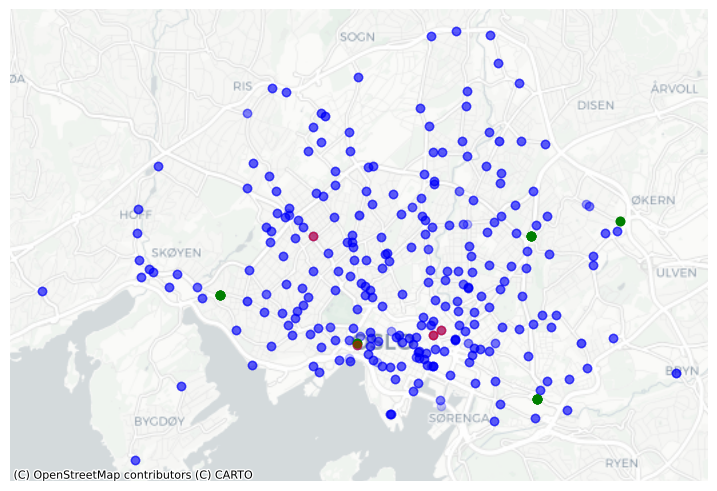

In [128]:
f, ax = plt.subplots(1, figsize=(9, 9))
stations_2019_df.plot(alpha=0.1, ax=ax, color='blue')
stations_change_2019_2020_df.plot(alpha=0.9, ax=ax, color='green')
stations_change_2020_2019_df.plot(alpha=0.1, ax=ax, color='red')
ax.set_axis_off()
cx.add_basemap(ax, crs=stations_2019_df.crs, source=cx.providers.CartoDB.Positron)

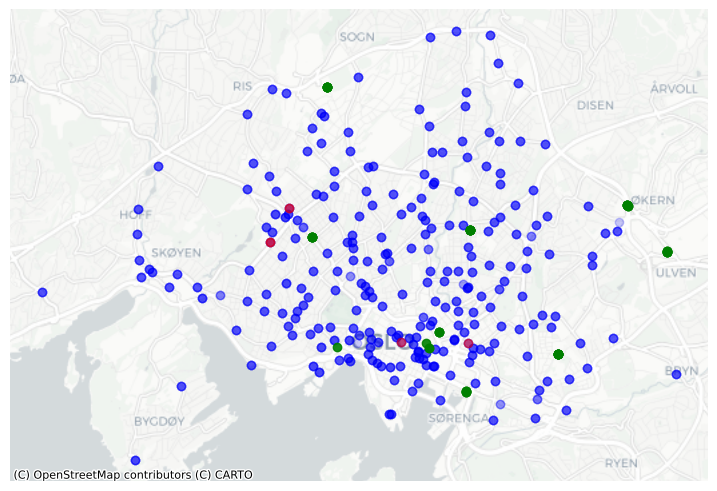

In [130]:
f, ax = plt.subplots(1, figsize=(9, 9))
stations_2020_df.plot(alpha=0.1, ax=ax, color='blue')
stations_change_2020_2021_df.plot(alpha=0.9, ax=ax, color='green')
stations_change_2021_2020_df.plot(alpha=0.1, ax=ax, color='red')
ax.set_axis_off()
cx.add_basemap(ax, crs=stations_2019_df.crs, source=cx.providers.CartoDB.Positron)

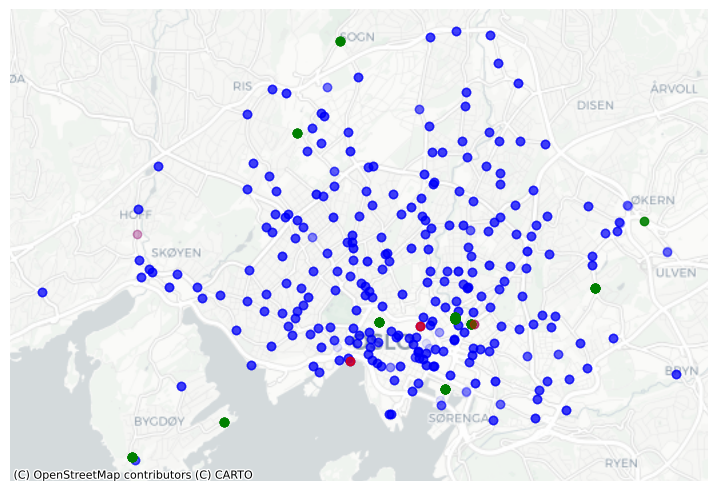

In [131]:
f, ax = plt.subplots(1, figsize=(9, 9))
stations_2021_df.plot(alpha=0.1, ax=ax, color='blue')
stations_change_2021_2022_df.plot(alpha=0.9, ax=ax, color='green')
stations_change_2022_2021_df.plot(alpha=0.1, ax=ax, color='red')
ax.set_axis_off()
cx.add_basemap(ax, crs=stations_2019_df.crs, source=cx.providers.CartoDB.Positron)

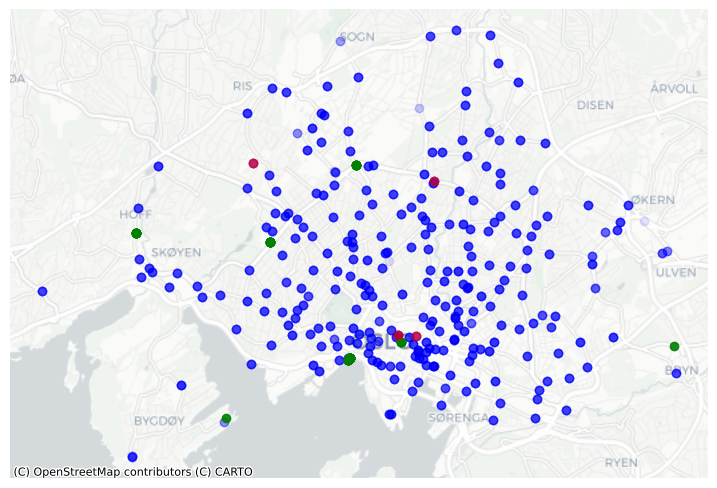

In [132]:
f, ax = plt.subplots(1, figsize=(9, 9))
stations_2022_df.plot(alpha=0.1, ax=ax, color='blue')
stations_change_2022_2023_df.plot(alpha=0.9, ax=ax, color='green')
stations_change_2023_2022_df.plot(alpha=0.1, ax=ax, color='red')
ax.set_axis_off()
cx.add_basemap(ax, crs=stations_2019_df.crs, source=cx.providers.CartoDB.Positron)

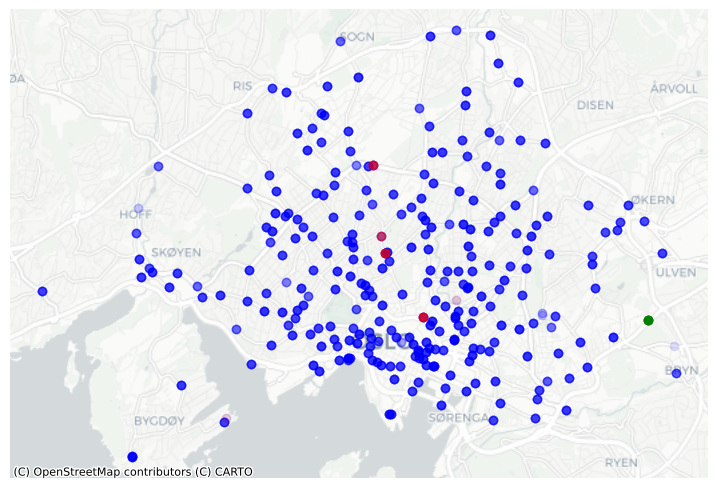

In [134]:
f, ax = plt.subplots(1, figsize=(9,9))
stations_2023_df.plot(alpha=0.1, ax=ax, color='blue')
stations_change_2023_2024_df.plot(alpha=0.9, ax=ax, color='green')
stations_change_2024_2023_df.plot(alpha=0.1, ax=ax, color='red')
ax.set_axis_off()
cx.add_basemap(ax, crs=stations_2019_df.crs, source=cx.providers.CartoDB.Positron)

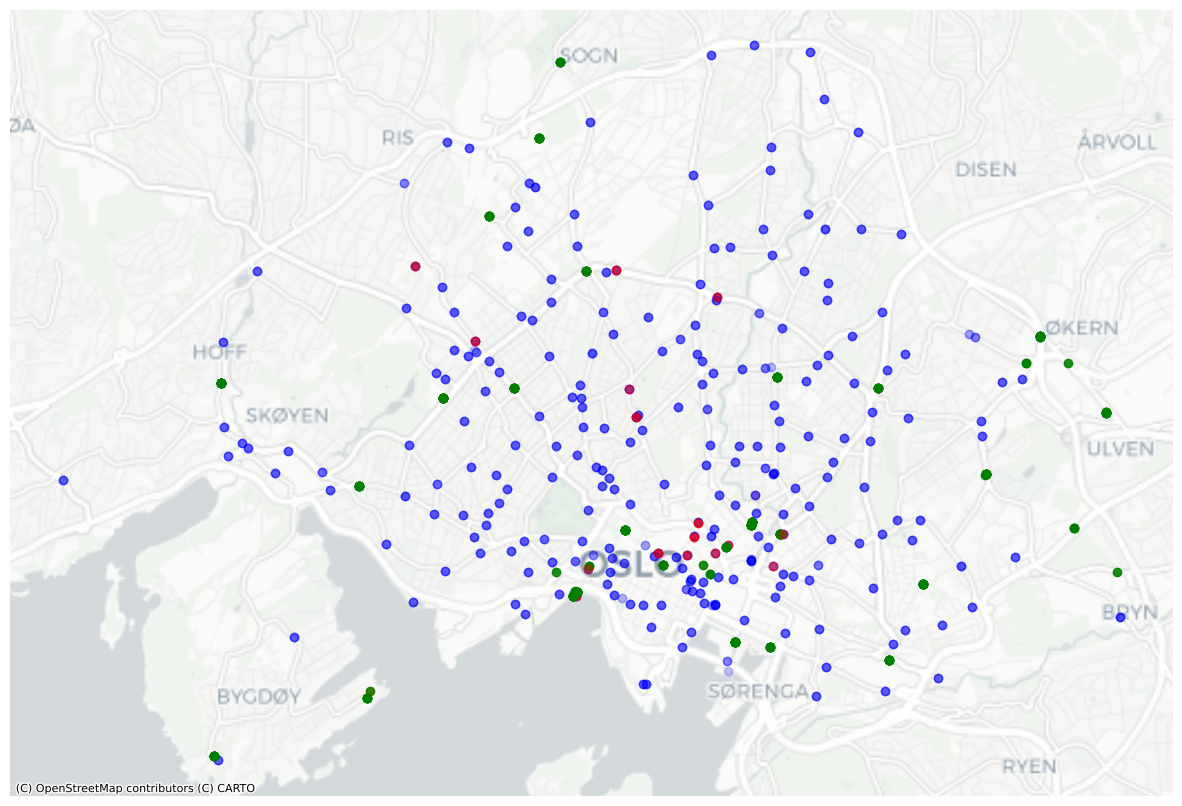

In [135]:
f, ax = plt.subplots(1, figsize=(15, 15))
stations_2019_df.plot(alpha=0.1, ax=ax, color='blue')
stations_change_2019_2020_df.plot(alpha=0.9, ax=ax, color='green')
stations_change_2020_2019_df.plot(alpha=0.1, ax=ax, color='red')
stations_change_2020_2021_df.plot(alpha=0.9, ax=ax, color='green')
stations_change_2021_2020_df.plot(alpha=0.1, ax=ax, color='red')
stations_change_2021_2022_df.plot(alpha=0.9, ax=ax, color='green')
stations_change_2022_2021_df.plot(alpha=0.1, ax=ax, color='red')
stations_change_2022_2023_df.plot(alpha=0.9, ax=ax, color='green')
stations_change_2023_2022_df.plot(alpha=0.1, ax=ax, color='red')
stations_change_2023_2024_df.plot(alpha=0.9, ax=ax, color='green')
stations_change_2024_2023_df.plot(alpha=0.1, ax=ax, color='red')
ax.set_axis_off()
cx.add_basemap(ax, crs=stations_2019_df.crs, source=cx.providers.CartoDB.Positron)